In [1]:
#data analysis
import numpy as np
import pandas as pd
import random as rnd

In [2]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
train.shape

(891, 12)

In [12]:
train['Survived'].value_counts()
#342 survived

0    549
1    342
Name: Survived, dtype: int64

In [13]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
for col in ['Sex', 'Pclass', 'Embarked']:
    train[col] = train[col].astype('category')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 65.7+ KB


In [16]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
mode = train['Embarked'].value_counts().index[0]
train['Embarked'].fillna(mode, inplace = True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 65.7+ KB


In [19]:
#test data missing values
test.info()

#fare has missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [20]:
test['Fare'].value_counts()

#numerical values so we can take mean 

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 169, dtype: int64

In [21]:
mean  = test['Fare'].mean()
mean

35.627188489208635

In [22]:
test['Fare'].fillna(mean, inplace = True)

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


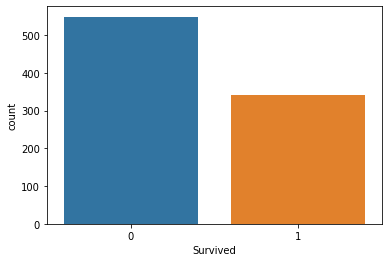

In [24]:
g1 = sb.countplot(x="Survived", data=train)

In [25]:
train[['Survived', 'Sex']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


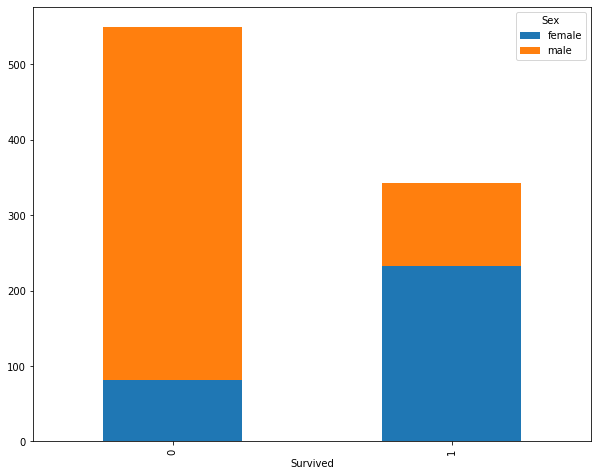

In [26]:
#0 = Not survived, 1 = survived
train.groupby(['Survived','Sex']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,8))
plt.show()


#the grapgh represents that the most males did not survive

In [27]:
train[['Survived', 'Pclass']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


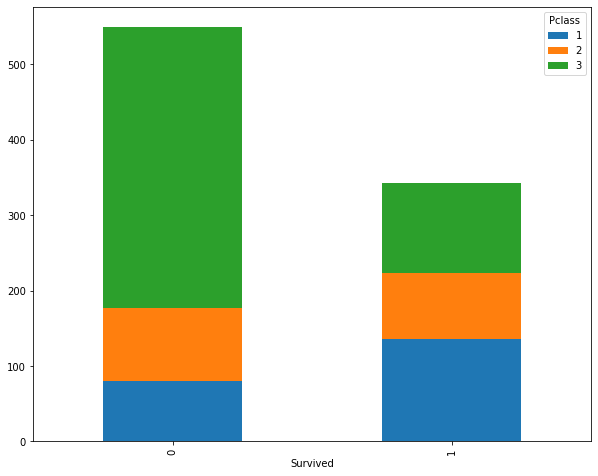

In [28]:
train.groupby(['Survived','Pclass']).size().unstack().plot(kind='bar', stacked=True , figsize=(10,8))
plt.show()

In [29]:
train[['Survived', 'Embarked']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


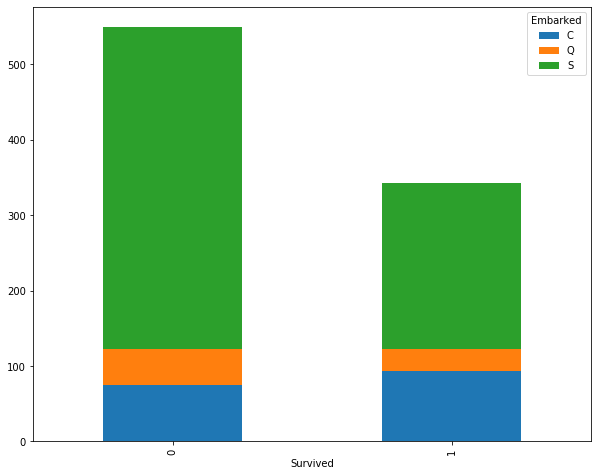

In [30]:
train.groupby(['Survived','Embarked']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,8))
plt.show()

In [31]:
train[['Survived', 'SibSp']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


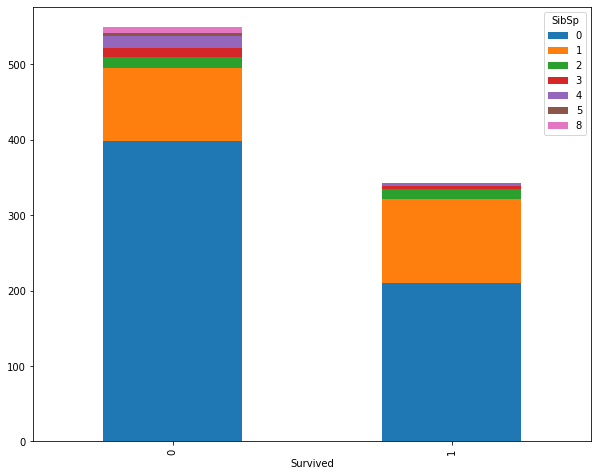

In [32]:
train.groupby(['Survived','SibSp']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,8) )
plt.show()

In [33]:
train[['Survived', 'Parch']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


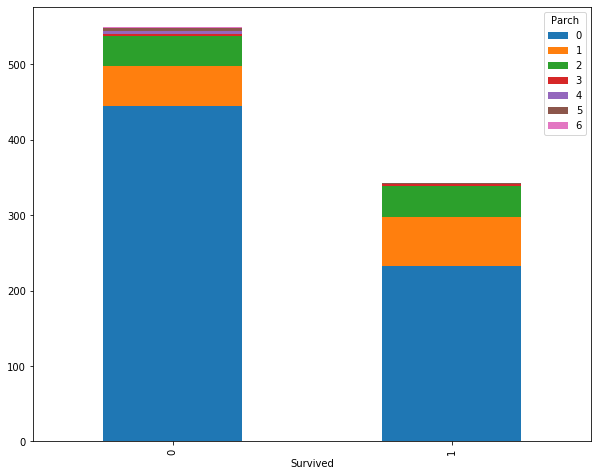

In [34]:
train.groupby(['Survived','Parch']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,8) )
plt.show()

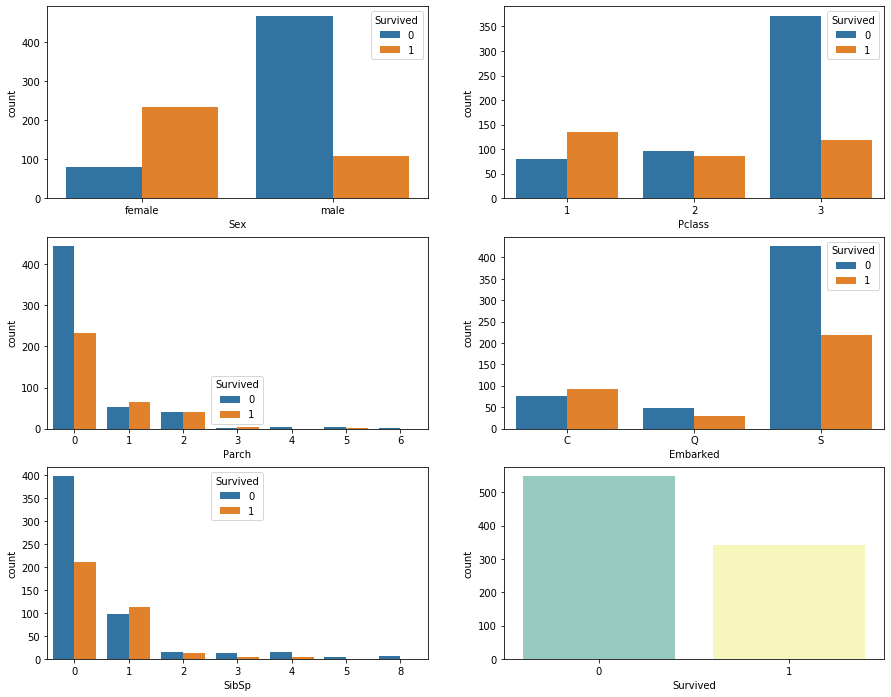

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,12))


sb.countplot(x="Sex", hue="Survived", data=train, ax=axes[0][0])
sb.countplot(x="Pclass", hue="Survived", data=train, ax=axes[0][1])
#sb.countplot(x="Survived", hue="Age", data=train, ax=axes[0][2])

sb.countplot(x="Parch", hue="Survived", data=train, ax=axes[1][0])
sb.countplot(x="Embarked", hue="Survived", data=train, ax=axes[1][1])
sb.countplot(x="SibSp", hue="Survived", data=train, ax=axes[2][0])
sb.countplot(x="Survived", data=train, ax=axes[2][1], palette="Set3")


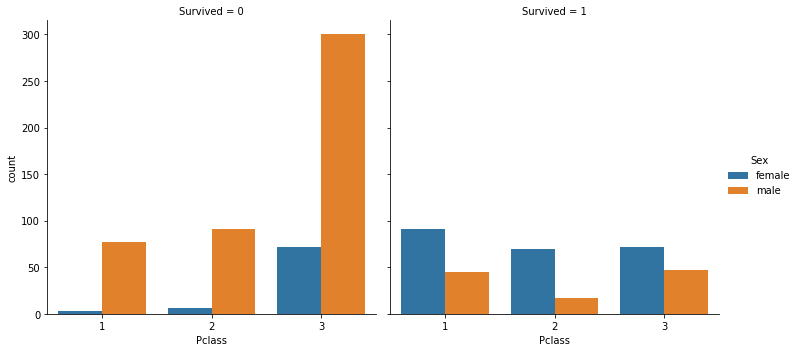

In [36]:
graph2 = sb.catplot(x="Pclass", hue="Sex", col="Survived", data=train, kind="count");

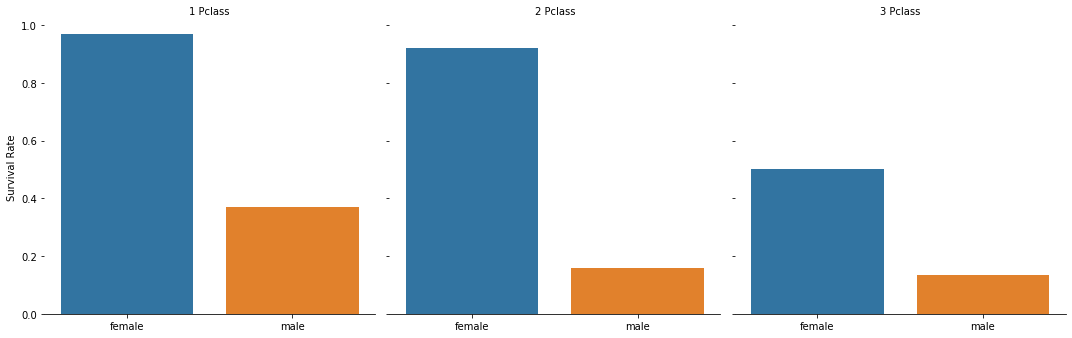

In [37]:
g = sb.catplot(x="Sex", y="Survived", col="Pclass", data=train, kind="bar", ci=None)
(g.set_axis_labels("", "Survival Rate").set_titles("{col_name} {col_var}").despine(left=True)) 